# <center><b>Week-6 Python Programming</b></center>
## <center><b>Classification</b></center>
### <center><i><u>Author: Ujjwal Karki</u></i></center>

### Classification
Guassian Naive Bayes Classifier
#### Load and prepare dataset

In [54]:
from sklearn.datasets import load_iris
from IPython.display import display
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# create new dataframe from iris data
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0:'setosa',1:'versicolor',2:'virginica'})

display(iris_df.head())

x = iris_df[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species'] # Target (species: 0 = setosa, 1 = versicolor, 2 = virginica)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Split into test and train dataset

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True)

Train the GNB classifier

In [56]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

Make predictions

In [57]:
y_pred = gnb.predict(x_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype='<U10')

Evaluate the model

In [58]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report: \n")
print(classification_report(y_test,y_pred))

Accuracy:  0.9666666666666667
Classification report: 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Breast-Cancer predicting classification model
### Loading and preparing the data

In [59]:
from IPython.display import display
import pandas as pd

data = pd.read_csv('./BreastCancer/wdbc.data')
data.columns = ['ID','Diagnosis','Radius1','Texture1','Perimeter1','Area1','Smoothness1','Compactness1','Concavity1'
                ,'Concave_points1','Symmetry1','Fractal_dimension1','Radius2','Texture2'
                ,'Perimeter2','Area2','Smoothness2','Compactness2','Concavity2'
                ,'Concave_points2','Symmetry2','Fractal_dimension2','Radius3','Texture2'
                ,'Perimeter3','Area3','Smoothness3','Compactness3','Concavity3'
                ,'Concave_points3','Symmetry3','Fractal_dimension3']
data.head()

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_points1,...,Radius3,Texture2,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_points3,Symmetry3,Fractal_dimension3
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### Train-test model

In [60]:
from sklearn.model_selection import train_test_split

# Defining the features and target 
x = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=True)

### Training the GNB Classifier

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

### Making prediction

In [62]:
y_pred = gnb.predict(x_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype='<U1')

### Evaluating the model

In [63]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report: \n")
print(classification_report(y_test,y_pred))

Accuracy:  0.7105263157894737
Classification report: 

              precision    recall  f1-score   support

           B       0.71      1.00      0.83        80
           M       1.00      0.03      0.06        34

    accuracy                           0.71       114
   macro avg       0.85      0.51      0.44       114
weighted avg       0.80      0.71      0.60       114



### Clustering algorithms
- K-means
- Meanshift
- DBSCAN

K-means clustering algorithm

- Choose th Number of clusters (k): We decide how many clusters you want the data divided into
- Initialize cluster centers: Randomly select k points from the data 

In [64]:
import pandas as pd

home_data = pd.read_csv('Data/housing.csv', usecols=['longitude','latitude','median_house_value'])

home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


### Plot scattered plot to visualize the data

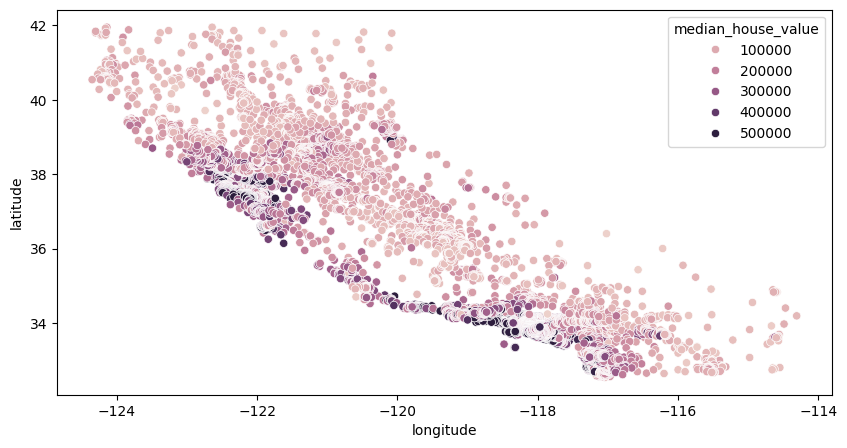

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()

Train-test and normalize dataset

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(home_data[['latitude','longitude']], home_data[['median_house_value']], 
                                                    test_size=0.33, random_state=0)

x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)

Fit the data to the K-means model and plot the clusters into scattered plot

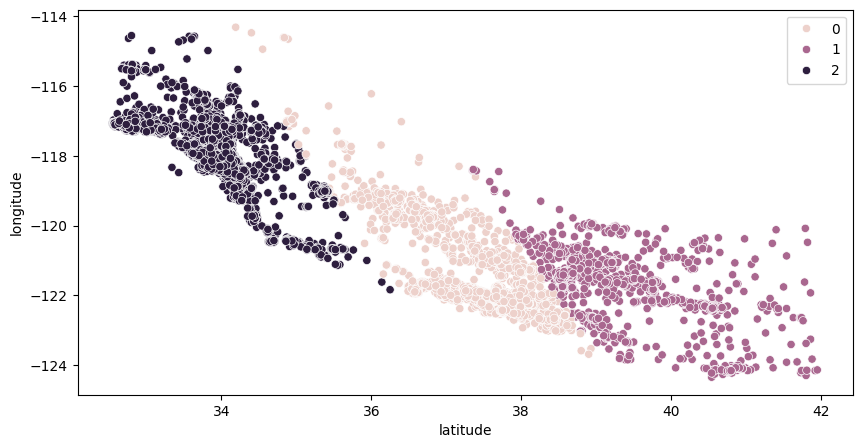

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(x_train_norm)

plt.figure(figsize=(10,5))
sns.scatterplot(data = x_train, x = 'latitude',y = 'longitude', hue=kmeans.labels_)

plt.show()

Evaluate clustering model using silhouetee score(lower score represents a better fit)

In [68]:
from sklearn.metrics import silhouette_score

silhouette_score(x_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920703546)

## Design simple artificial neural network
- 1 input
- 1 hidden 
- 1 output layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate = 0.01):
        
        # Initialize network parameters
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.learning_rate = learning_rate
 
        # Random initialization of weights and biases
        np.random.seed(42)
        self.w1 = np.random.randn(input_neurons, hidden_neurons)
        self.b1 = np.random.randn(hidden_neurons)
        self.w2 = np.random.randn(hidden_neurons, output_neurons)
        self.b2 = np.random.randn(output_neurons)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivation(self, x):
        return x * (1-x)
    
    def forward_pass(self,x):
        self.z1 = np.dot(x, self.w1) + self.b1 # w1.x + b
        self.a1 = self.sigmoid(self.z1) # Apply sigmoid activation function f(z)  = sigmoid(z)
        self.z2 = np.dot(self.a1, self.w2) + self.b2 
        self.output = self.sigmoid(self.z2) # Apply sigmoid activation function

        return self.output
    
    def compute_loss(self,y_pred,y_true):
        return np.mean(np.square(y_true - y_pred))

    def backpropagate(self, x, y_true, y_pred):
        error_output = y_pred - y_true
        d_output = error_output * self.sigmoid_derivation(y_pred)
        error_hidden = d_output.dot(self.w2.T)
        d_hidden = error_hidden * self.sigmoid_derivation(self.a1)

        self.w2 -= self.a1.T.dot(d_output) * self.learning_rate
        self.b2 -= np.sum(d_output, axis=0) * self.learning_rate

        self.w1 -= x.T.dot(d_hidden) * self.learning_rate
        self.b1 -= np.sum(d_hidden, axis=0) * self.learning_rate

    def train(self, x, y, epochs =5000):
        for epoch in range(epochs):
            y_pred = self.forward_pass(x)

            # compute loss
            loss = self.compute_loss(y_pred, y)

            # Backpropagation and weights update
            self.backpropagate(x,y,y_pred)

            if epoch % 1000 == 0:
                print(self.w1,self.w2)
                print(f'Epoch {epoch}, Loss:{loss:.4f}')
        
    def predict(self, x):
        return self.forward_pass(x)
            

Train model for predicting the house price by sq.feet

[[0.49671415]] [[1467.37370597]]
Epoch 0, Loss:86783878265.4901
[[0.49671415]] [[1467.37370597]]
Epoch 1000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 2000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 3000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 4000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 5000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 6000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 7000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 8000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 9000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 10000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 11000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 12000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 13000, Loss:86783823796.3995
[[0.49671415]] [[1467.37370597]]
Epoch 14000, Loss:8678382379

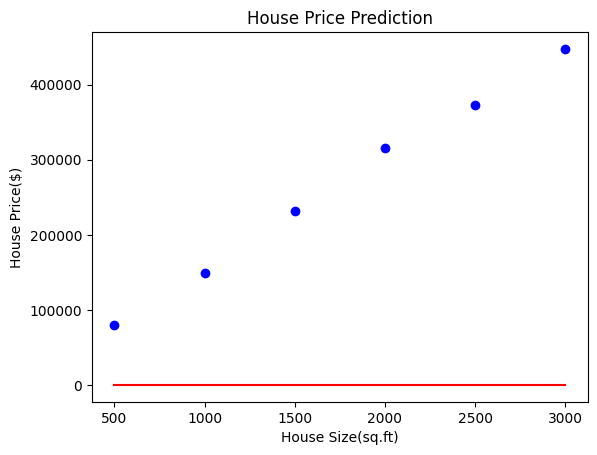

In [2]:
# create some synthetic data for house sizes and corresponding prices

np.random.seed(42)

x = np.array([[500],[1000],[1500],[2000],[2500],[3000]])
y = x * 150 + (np.random.randn(*x.shape) * 10000) # Random noise

nn = NeuralNetwork(input_neurons=1, hidden_neurons=1, output_neurons=1, learning_rate=0.01)
nn.train(x, y, epochs=50000)

predictions = nn.predict(x)

# Plotting the data
plt.scatter(x,y,color='blue',label='Actual Prices') # Actual prices
plt.plot(x,predictions,color='red',label='Predicted prices') # Predicted prices
plt.xlabel('House Size(sq.ft)')
plt.ylabel('House Price($)')
plt.title('House Price Prediction')
plt.legend
plt.show()

## Using TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist # Inbuilt dataset like iris.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

(x_train,y_train), (x_test,y_test) = mnist.load_data()

# Normalize data (scale pixel values to range 0-1)
x_train = x_train/ 255.0
x_test = x_test/ 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28,28)), # Input shape is 28x28
    Dense(128, activation='relu'), # Hidden layer with 128 units and ReLU activation
    Dense(10, activation='softmax'), # Hidden layer with 10 units and softmax activation
])

# set learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
                monitor = 'val_loss',
                patience = 3,
                restore_best_weights = True,
)

model.fit(x_train,y_train,epochs=5,batch_size = 32)

test_loss, test_acc = model.evaluate(x_test,y_test)
print(f'True accuracy: {test_acc}')

predictions = model.predict(x_test)
print(f'Prediction for first test image: {np.argmax(predictions[0])}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/home/root123/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1732679365.462151   10471 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8973 - loss: 0.3387
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9571 - loss: 0.1545
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9626 - loss: 0.1370
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9661 - loss: 0.1240
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9711 - loss: 0.1127
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9501 - loss: 0.2274
True accuracy: 0.9581999778747559
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction for first test image: 7


## Save model

In [4]:
model.save('./trained-data/handwritten-digit-model.keras')

## Use real images

In [7]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os

# Load the trained model
model = load_model('trained-data/handwritten-digit-model.keras')

def prepare_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1,28,28)
    return img_array

image_directory = 'Data/another_6.png'
processed_image = prepare_image(image_directory)
predictions = model.predict(processed_image)
predicted_digit = np.argmax(predictions)
print(f'Predicted digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 6
